In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class IsotropicSteel:
    E = 0
    sigma_y = 0
    H = 0
    elastic = True
    sigma = 0
    accumulated_plastic_strain = 0
    accumulated_strain = 0

    def __init__(self, E, sigma_y, H):
        self.E = E
        self.sigma_y = sigma_y
        self.H = H

    def increment_strain(self, delta_epsilon):
        # step 1
        delta_s = self.E * delta_epsilon
        s = self.sigma + delta_s
        self.sigma_y = self.sigma_y + self.H * self.accumulated_plastic_strain
        
        # step 2
        if self.elastic:
            if (np.abs(s) < self.sigma_y): # remains elastic
                self.accumulated_strain =+ delta_epsilon
                self.sigma = s
                return
            else: # becomes plastic
                self.elastic = False
                beta = (self.sigma_y - np.abs(self.sigma)) / (np.abs(s) - np.abs(self.sigma))
        else:
            # step 3 - only triggered if yielded
            if (self.sigma*delta_s < 0): # element is unloading or reloading
                self.elastic = True
                self.accumulated_strain =+ delta_epsilon
                self.sigma = s
                return
            else: # element is yielded and continues to yield
                beta = 0
                
        # step 4
        self.accumulated_strain =+ delta_epsilon
        self.sigma = self.sigma + beta*delta_s + ((self.E * self.H)/(self.E + self.H))*(1 - beta)*delta_epsilon
        self.accumulated_plastic_strain = self.accumulated_plastic_strain + ((1 - beta)/(1 + (self.H/self.E)))*np.abs(delta_epsilon)


In [5]:
YIELD_STRENGTH = 435e6
YOUNGS_MODULUS = 2e11
STRAIN_HARDENING = 0.01
yield_strain = YIELD_STRENGTH / YOUNGS_MODULUS
strain_increments = np.arange(0.0, 2*yield_strain, 0.01 * yield_strain)



Text(0, 0.5, 'Stress (MPa)')

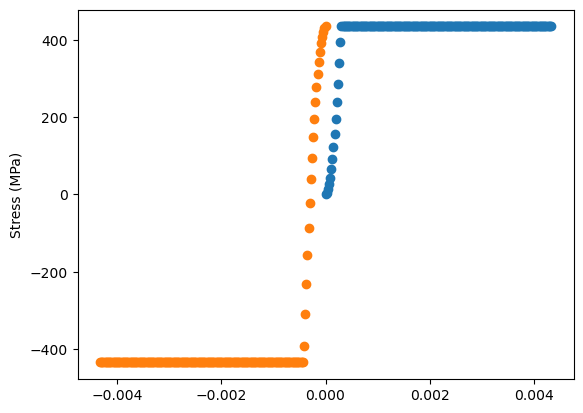

In [6]:
stress = []
strain = []
modulus = []
yield_stress = []
steel = IsotropicSteel(YOUNGS_MODULUS, YIELD_STRENGTH, STRAIN_HARDENING)

for increment in strain_increments:
    steel.increment_strain(increment)
    stress.append(steel.sigma*1e-6)
    strain.append(steel.accumulated_strain)
    yield_stress.append(steel.sigma_y*1e-6)

for increment in strain_increments:
    steel.increment_strain(-increment)
    stress.append(steel.sigma*1e-6)
    strain.append(steel.accumulated_strain)
    yield_stress.append(steel.sigma_y*1e-6)

plt.scatter(strain[0:len(strain_increments)], stress[0:len(strain_increments)])
plt.scatter(strain[len(strain_increments):], stress[len(strain_increments):])
plt.ylabel('Stress (MPa)')

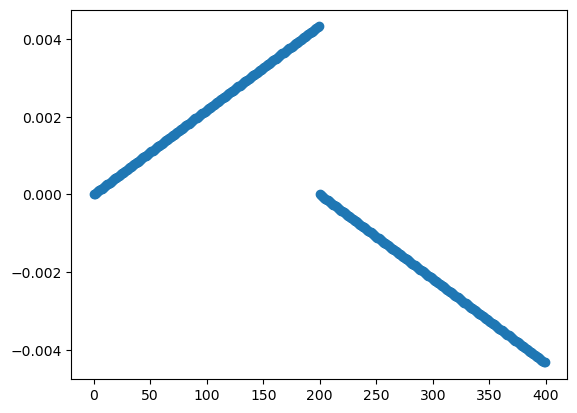

In [8]:
plt.scatter(np.arange(len(strain)), strain)